# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import numpy as np

from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, Normalize, ToTensor, Compose
import matplotlib.pyplot as plt
import glob

# You may add any imports you need

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform):
        # YOUR CODE
        pass
    def __getitem__(self, idx):
        # YOUR CODE
        pass
    def __len__(self, idx):
        # YOUR CODE
        pass

In [ ]:
!unzip dataset.zip -d dataset

In [ ]:
import random
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, Normalize, ToTensor, Compose
random.seed(9)
torch.manual_seed(9)
torch.set_deterministic(True)


train_transform = Compose([Resize((224, 224)), ToTensor(), Normalize((0.5, 0.5, 0.5), (1, 1, 1)), ])
val_transform = Compose([Resize((224, 224)), ToTensor(), Normalize((0.5, 0.5, 0.5), (1, 1, 1)), ])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset_1 = ImageFolder("/content/dataset/dataset/dataset/train", transform=train_transform)
val_dataset_1 = ImageFolder("/content/dataset/dataset/dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

In [ ]:
train_dataloader_1 = torch.utils.data.DataLoader(train_dataset_1, batch_size=256, shuffle=True, num_workers=4)
val_dataloader_1 = torch.utils.data.DataLoader(val_dataset_1, batch_size=256, shuffle=True, num_workers=4)

In [ ]:
# Just very simple checks
assert isinstance(train_dataset_1[0], tuple)
assert len(train_dataset_1[0]) == 2
assert isinstance(train_dataset_1[1][1], int)
print("tests passed")

tests passed


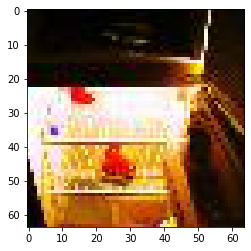

In [ ]:
file = np.random.choice(glob.glob("/content/dataset/dataset/dataset/train/*/*.jpg"))
plt.imshow(plt.imread(file))

In [ ]:
from torchvision.models import resnet34

model = resnet34(pretrained=True)
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

In [ ]:
for param in model.parameters():
    param.requires_grad = False
model.fc = nn.Linear(512, 200)

In [ ]:
import tqdm
from sklearn.metrics import accuracy_score
import sys

def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    model = model.to(device).train()
    total_loss = 0
    num_batches = 0
    all_losses = []
    total_predictions = np.array([])#.reshape((0, ))
    total_labels = np.array([])#.reshape((0, ))
    with tqdm.tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
        for images, labels in train_dataloader:
            # Move Batch to GPU
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            # Update weights
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # Update descirption for tqdm
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}")
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
            all_losses.append(loss.detach().item())
    metrics = {'loss': total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    return metrics, all_losses


def predict(model, val_dataloader, criterion, device="cuda:0"):
    model.eval()
    total_loss = 0
    num_batches = 0
    total_predictions = np.array([])
    total_labels = np.array([])
    with tqdm.tqdm(total=len(val_dataloader), file=sys.stdout) as prbar:
        for images, labels in val_dataloader:
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}")
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
    metrics = {'loss': total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    return total_loss / num_batches, total_predictions, total_labels


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    model = model.to(device)
    all_train_losses = []
    epoch_train_losses = []
    epoch_eval_losses = []
    for epoch in range(n_epochs):
        # Train step
        print(f"Train Epoch: {epoch}")
        train_metrics, one_epoch_train_losses = train_one_epoch(
            model=model,
            train_dataloader=train_dataloader,
            criterion=criterion,
            optimizer=optimizer,
            device = device)
        # Save Train losses
        all_train_losses.extend(one_epoch_train_losses)
        epoch_train_losses.append(train_metrics['loss'])
        # Eval step
        print(f"Validation Epoch: {epoch}")
        with torch.no_grad():
            validation_metrics = predict(
                model=model,
                val_dataloader=val_dataloader,
                criterion=criterion,
                device = device)
        # Save eval losses
        epoch_eval_losses.append(validation_metrics[0])

In [ ]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model = resnet34(pretrained=True)
model.to(device)
for param in model.parameters():
  param.requires_grad = False
model.fc = nn.Linear(512, 200)
optimizer = torch.optim.Adam(model.fc.parameters())
train_dataloader = train_dataloader_1
val_dataloader = val_dataloader_1
criterion = nn.CrossEntropyLoss()
scheduler = None
n_epochs = 10
model.to(device)

Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset_1)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

Loss: 5.5907 Accuracy: 0.0: 100%|██████████| 40/40 [00:25<00:00,  1.56it/s]
tests passed


Запустить обучение можно в ячейке ниже.

In [ ]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

Train Epoch: 0
Loss: 1.9819 Accuracy: 52.3809: 100%|██████████| 391/391 [04:07<00:00,  1.58it/s]
Validation Epoch: 0
Loss: 1.4639 Accuracy: 62.5: 100%|██████████| 40/40 [00:26<00:00,  1.52it/s]
Train Epoch: 1
Loss: 1.4426 Accuracy: 61.9048: 100%|██████████| 391/391 [04:08<00:00,  1.57it/s]
Validation Epoch: 1
Loss: 1.4398 Accuracy: 75.0: 100%|██████████| 40/40 [00:26<00:00,  1.52it/s]
Train Epoch: 2
Loss: 1.2522 Accuracy: 67.3469: 100%|██████████| 391/391 [04:08<00:00,  1.57it/s]
Validation Epoch: 2
Loss: 1.0784 Accuracy: 75.0: 100%|██████████| 40/40 [00:26<00:00,  1.52it/s]
Train Epoch: 3
Loss: 1.1933 Accuracy: 68.7075: 100%|██████████| 391/391 [04:08<00:00,  1.57it/s]
Validation Epoch: 3
Loss: 1.2855 Accuracy: 68.75: 100%|██████████| 40/40 [00:26<00:00,  1.53it/s]
Train Epoch: 4
Loss: 1.2869 Accuracy: 65.9864: 100%|██████████| 391/391 [04:08<00:00,  1.58it/s]
Validation Epoch: 4
Loss: 1.7362 Accuracy: 50.0: 100%|██████████| 40/40 [00:26<00:00,  1.52it/s]
Train Epoch: 5
Loss: 1.2376 A

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset_1)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))

Loss: 2.5142 Accuracy: 68.75: 100%|██████████| 40/40 [00:26<00:00,  1.50it/s]
Оценка за это задание составит 5 баллов


Подсчет вместе с бонусом:

In [ ]:
if accuracy>=0.52:
  mark = min(15, min(5, 5 * accuracy / 0.44) + 10)
else:
  mark = min(5, 5 * accuracy / 0.44)
print("Оценка за это задание составит {} баллов".format(mark))

Оценка за это задание составит 15 баллов


__Ваш отчёт о проделанных экспериментах__: 

Вообще любая предобученная модель выдает результаты больше 44% accuracy, поэтому конечно можно поиграться с трансформациями, оптимизаторами и самими моделями (resnet18, vgg и inception показали себя чить хуже), но в принципе и так неплохие метрики на валидации, тем более в задании просили >52%, так что "лучшее - враг хорошего".

Но я пробовала различные: 

*   трансформации: 
    
    основные отличия были в нормализации

    **albumentations** не улучшила процесс обучения

*   модели (конечно же предобученные):

    **resnet18** -- оказалась простовата и давала слабенькие метрики
    
    **resnet34** -- оптимальный вариант по соотношению время обучения / качество

    **vgg** -- довольно хорошо обучалась, но с 3 эпохи метрики стабильно падали (переобучение на лицо)

    **inception** -- слишком долго и тяжело обучалась (от 7 минут на эпоху на train)

*   оптимизаторы:

    **Adam** -- показал себя неплохо, решила оставить
    
    **SGD** -- честно было лень подбирать параметры, наверняка можно было бы обойтись и им, добившись хороших метрик. Я попробовала только

```
torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
```
метрики были хуже, чем у Адама, учился дольше (достигал такого же кажества), так что решила не брать.

## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
torch.set_deterministic(True)

In [ ]:
!unzip archive.zip -d archive

In [3]:
# we will need this library to process the labeling
! pip install xmltodict

In [4]:
import xmltodict, json

Датасет мы за вас написали.

In [5]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import xmltodict
import json
import glob
import cv2
import os
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import auc
# add any imports you need

class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.images = []
        self.annotations = []
        self.transform = transform
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )

    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            return res["image"], {
                "boxes": torch.tensor(res["bboxes"]),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [6]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    ## TODO YOUR CODE

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in enumerate(test_loader):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]

            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                results.extend(evaluate_sample(target_pred, target_true))

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    if results[0]["TP"] == 1:
        acc_TP[0] = 1
    else:
        acc_FP[0] = 1

    for i in range(1, len(results)):
        acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
        acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

        precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
        recall[i] = acc_TP[i] / nbr_boxes

    return auc(recall, precision)

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

In [7]:
def train_one_epoch(model, train_dataloader, optimizer, device):
    model.train()
    n = 0
    global_loss = 0
    for images, targets in train_dataloader:
        images = list(image.to(device).float() for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        dict_loss = model(images, targets)
        losses = sum(loss for loss in dict_loss.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        n += 1
        global_loss += float(losses.cpu().detach().numpy())

        if n % 10 == 0:
            print("Loss value after {} batches is {}".format(n, round(global_loss / n, 2)))

    return global_loss
    # YOUR CODE
    # TRAIN YOUR MODEL ON THE train_dataloader



def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    for epoch in range(n_epochs):
        train_one_epoch(model, train_dataloader, optimizer, device=device)
        a = evaluate(model, val_dataloader, device=device)
        print("AUC ON TEST: {:.4f}".format(a))

In [ ]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

In [9]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensor
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

transform_t = A.Compose([
    A.HorizontalFlip(p=0.5),
    #A.Normalize(),
    A.RandomBrightnessContrast(p=0.2),
    ToTensor(),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

transform_v = A.Compose([
    A.HorizontalFlip(p=0.5),
    #A.Normalize(),
    ToTensor(),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

train_transform = transform_t # YOUR CODE FOR AUGMENTATIONS
val_transform = transform_v # YOUR CODE FOR VALIDATION AUGMENTATIONS
# HINT: TRAIN TRANSFORM OBVIOUSLY SHOULD BE HARDER THAN THOSE FOR VALIDATION

train_dataset = FruitDataset("/content/archive/train_zip/train", transform=train_transform)
val_dataset = FruitDataset("/content/archive/test_zip/test", transform=val_transform)

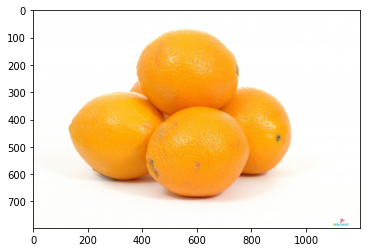

In [10]:
file = np.random.choice(glob.glob("/content/archive/*/*/*.jpg"))
plt.imshow(plt.imread(file))

In [13]:
def get_detection_model(num_classes=4):
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

model = get_detection_model(num_classes = 4) # YOUR CODE, CREATE MODEL FOR OBJECT DETECTION
# HINT: USE MATERIALS FROM THE SEMINAR
# YOU CAN USE torchvision.models AND torchvision.models.detection
# READ OFFICIAL DOCS FOR MORE INFO

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [18]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

def collate_fn(batch):
    return tuple(zip(*batch))

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn = collate_fn)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

n_epochs = 3
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model=model.to(device)

train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs)

Loss value after 10 batches is 0.1
Loss value after 20 batches is 0.13
Loss value after 30 batches is 0.15
Loss value after 40 batches is 0.17
Loss value after 50 batches is 0.17
Loss value after 60 batches is 0.17
Loss value after 70 batches is 0.17
Loss value after 80 batches is 0.16
Loss value after 90 batches is 0.16
Loss value after 100 batches is 0.17
Loss value after 110 batches is 0.17
Loss value after 120 batches is 0.17
Loss value after 130 batches is 0.17
Loss value after 140 batches is 0.18
Loss value after 150 batches is 0.18
Loss value after 160 batches is 0.18
Loss value after 170 batches is 0.18
Loss value after 180 batches is 0.18
Loss value after 190 batches is 0.18
Loss value after 200 batches is 0.18
Loss value after 210 batches is 0.18
Loss value after 220 batches is 0.18
Loss value after 230 batches is 0.18
Loss value after 240 batches is 0.18
AUC ON TEST: 0.9113
Loss value after 10 batches is 0.14
Loss value after 20 batches is 0.14
Loss value after 30 batches is

__Выведите итоговое качество модели__.

In [21]:
auc_1 = evaluate(model, val_dataloader, device)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * auc_1 / 0.91)))

Оценка за это задание составит 4 баллов


Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

In [19]:
image, labels = next(iter(val_dataset))
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
pred = model(image.unsqueeze(0).to(device))[0]

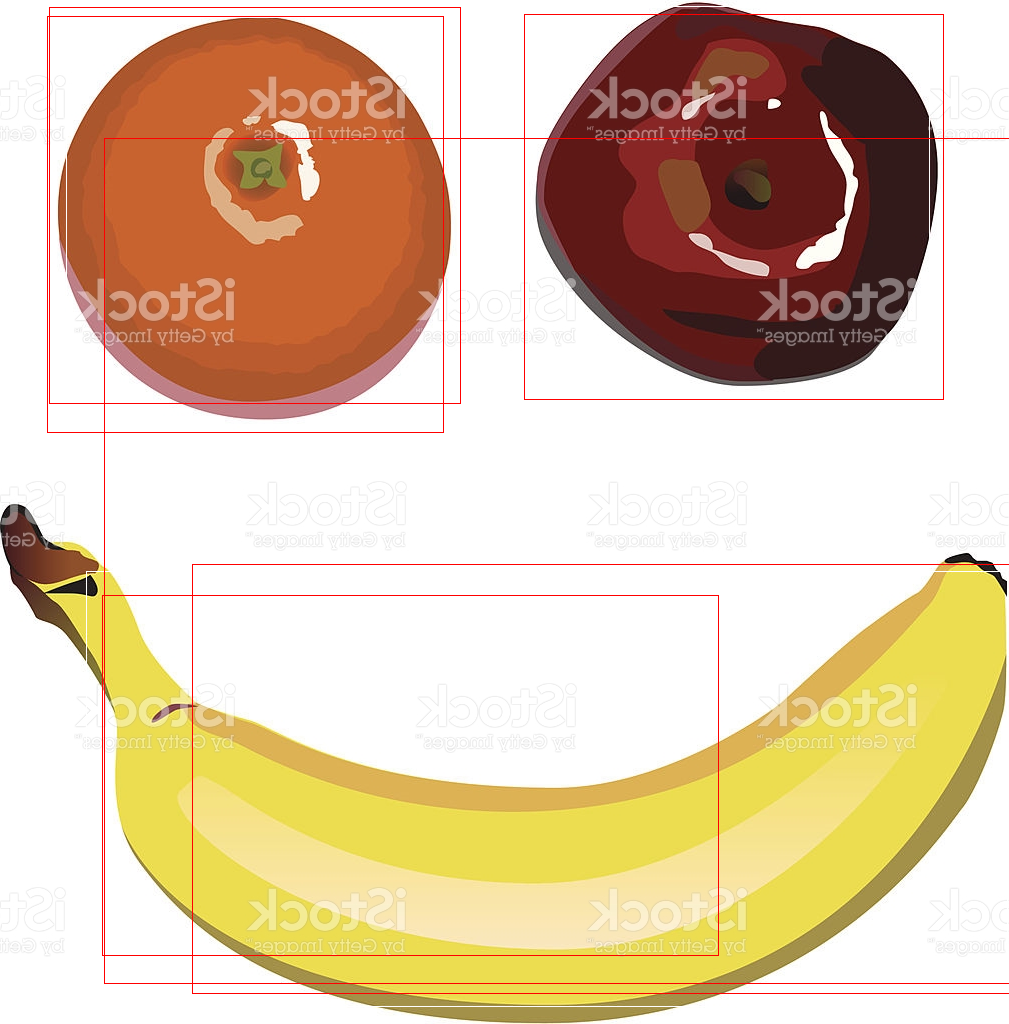

In [20]:
from PIL import ImageDraw

image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

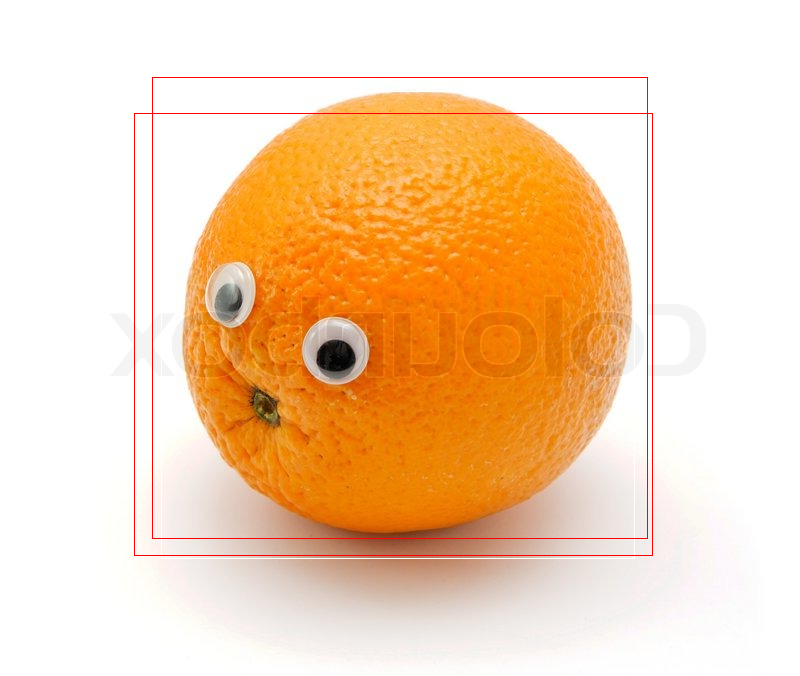

In [ ]:
from PIL import ImageDraw

image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса.

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек.